## Observations and Insights 

In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
unique_count = len(combined_df["Mouse ID"].value_counts())
num_dict = {
    "Number of Unique Mice": unique_count
}
num_of_mice = pd.DataFrame([num_dict])
num_of_mice

,Number of Unique Mice
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint',]),:].value_counts()

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_df = pd.DataFrame(duplicated_mice)
duplicated_df.head()

0
Mouse ID Drug Regimen Sex    Age_months Weight (g) Timepoint Tumor Volume (mm3) Metastatic Sites   
g989     Propriva     Female 21         26         20        54.657650          1                 1
                                                   15        53.442020          0                 1
                                                   10        49.880528          0                 1
                                                   5         47.570392          0                 1
                                                   0         45.000000          0                 1

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_df = combined_df[combined_df["Mouse ID"].isin(duplicated_df) == False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame
len(combined_df["Mouse ID"].value_counts())-1

248

## Summary Statistics

In [7]:
clean_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sd = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

tumor_volume_stats = pd.DataFrame({
    "Mean": round(mean,2),
     "Median": round(median, 2),
     "Variance": round(variance, 2),
    "Standard Deviation": round(sd, 2),
    "SEM": round(sem, 2)
})

tumor_volume_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [9]:
# Using the aggregation method, produce the same summary statistics in a single line
drug_groupby = clean_df.groupby('Drug Regimen')
tumor_volume_stats_aggr = drug_groupby.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
tumor_volume_stats_aggr

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


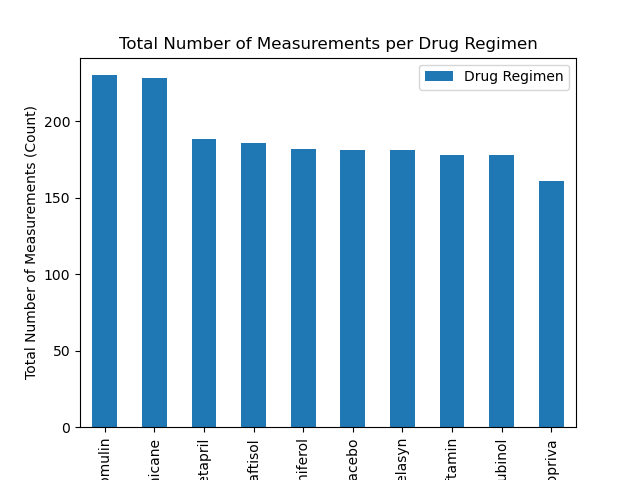

<AxesSubplot:title={'center':'Total Number of Measurements per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Number of Measurements (Count)'>

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_drugs = clean_df["Drug Regimen"].value_counts()
count_drugs.plot(kind="bar", title="Total Number of Measurements per Drug Regimen", xlabel="Drug Regimen", 
            ylabel="Total Number of Measurements (Count)", legend="best")

In [18]:
count_per_drug = pd.DataFrame(clean_df['Drug Regimen'].value_counts())
count_per_drug

,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178
Propriva,161


<IPython.core.display.Javascript object>


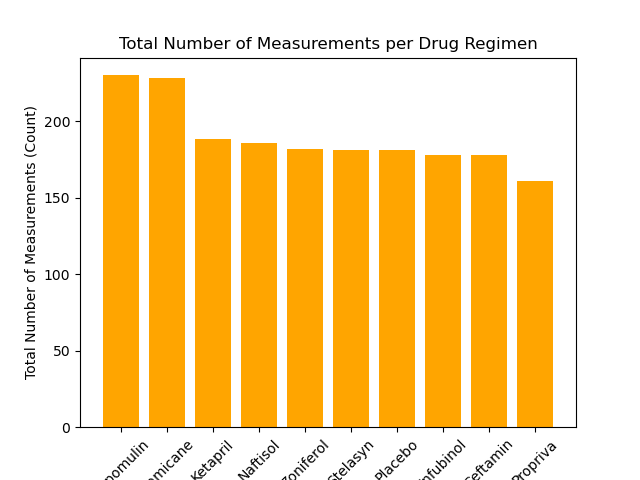

Text(0, 0.5, 'Total Number of Measurements (Count)')

In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot
drugs = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]
plt.xticks(rotation=45)
plt.bar(drugs, count_per_drug["Drug Regimen"], color="orange", align="center")
plt.title("Total Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements (Count)")

In [20]:
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


<IPython.core.display.Javascript object>


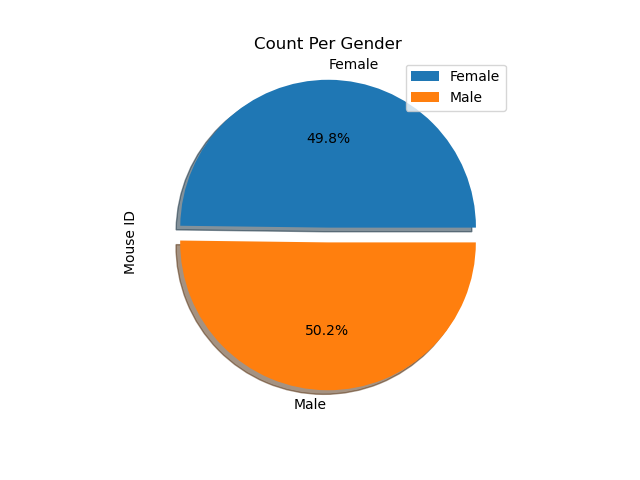

<AxesSubplot:title={'center':'Count Per Gender'}, ylabel='Mouse ID'>

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_sex = clean_df.groupby("Sex")["Mouse ID"].nunique()
groupby_sex_df = pd.DataFrame(groupby_sex)
explode = (0.1, 0)
groupby_sex_df["Mouse ID"].plot(kind="pie", title="Count Per Gender", legend="best", shadow = True, explode=explode, autopct="%1.1f%%")

In [22]:
groupby_sex_df

,Mouse ID
Sex,
Female,124
Male,125


In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [124, 125]
colors = ["blue", "orange"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True)
plt.title("Count Per Gender")
plt.legend(loc="best")


<IPython.core.display.Javascript object>

## Quartiles, Outliers and Boxplots

In [24]:
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ram_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
inf_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ceft_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]    

#capomulin
cap_max = cap_df.groupby("Mouse ID")["Timepoint"].max()
cap_max = pd.DataFrame(cap_max)
cap_merge = pd.merge(cap_max, clean_df, on=("Mouse ID", "Timepoint"), how="left")
cap_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [56]:
#ramicane
ram_max = ram_df.groupby("Mouse ID")["Timepoint"].max()
ram_max = pd.DataFrame(ram_max)
ram_merge = pd.merge(ram_max, clean_df, on=("Mouse ID", "Timepoint"), how="left")
ram_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [57]:
#infubinol
inf_max = inf_df.groupby("Mouse ID")["Timepoint"].max()
inf_max = pd.DataFrame(inf_max)
inf_merge = pd.merge(inf_max, clean_df, on=("Mouse ID", "Timepoint"), how="left")
inf_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [58]:
#ceftamin
ceft_max = ceft_df.groupby("Mouse ID")["Timepoint"].max()
ceft_max = pd.DataFrame(ceft_max)
ceft_merge = pd.merge(ceft_max, clean_df, on=("Mouse ID", "Timepoint"), how="left")
ceft_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [59]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cap_volumes = cap_merge["Tumor Volume (mm3)"]
cap_quartiles = cap_volumes.quantile([0.25, 0.5, 0.75])
cap_iqr = cap_quartiles[0.75] - cap_quartiles[0.25]
tumor_volumes.append(cap_volumes)

ram_volumes = ram_merge["Tumor Volume (mm3)"]
ram_quartiles = ram_volumes.quantile([0.25, 0.5, 0.75])
ram_iqr = ram_quartiles[0.75] - ram_quartiles[0.25]
tumor_volumes.append(ram_volumes)

inf_volumes = inf_merge["Tumor Volume (mm3)"]
inf_quartiles = inf_volumes.quantile([0.25, 0.5, 0.75])
inf_iqr = inf_quartiles[0.75] - inf_quartiles[0.25]
tumor_volumes.append(inf_volumes)

ceft_volumes = ceft_merge["Tumor Volume (mm3)"]
ceft_quartiles = ceft_volumes.quantile([0.25, 0.5, 0.75])
ceft_iqr = ceft_quartiles[0.75] - ceft_quartiles[0.25]
tumor_volumes.append(ceft_volumes)
    
    # Determine outliers using upper and lower bounds
cap_lowerbound = cap_quartiles[0.25] - (1.5*cap_iqr)
cap_uperbound = cap_quartiles[0.75] + (1.5*cap_iqr)
    
ram_lowerbound = ram_quartiles[0.25] - (1.5*ram_iqr)
ram_uperbound = ram_quartiles[0.75] + (1.5*ram_iqr)
    
inf_lowerbound = inf_quartiles[0.25] - (1.5*inf_iqr)
inf_uperbound = inf_quartiles[0.75] + (1.5*inf_iqr)

ceft_lowerbound = ceft_quartiles[0.25] - (1.5*ceft_iqr)
ceft_uperbound = ceft_quartiles[0.75] + (1.5*ceft_iqr)

<IPython.core.display.Javascript object>


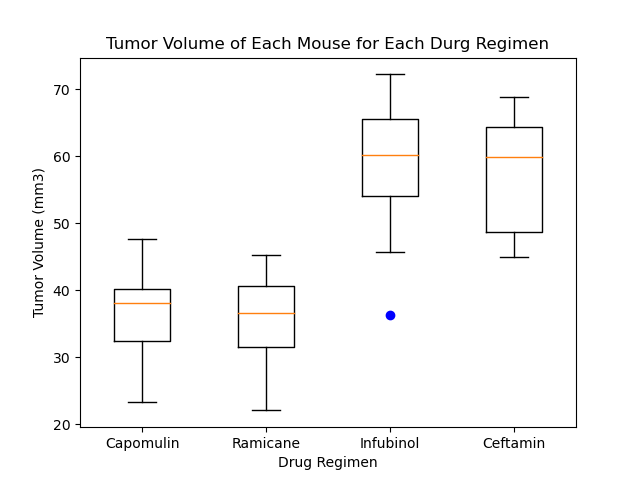

{'whiskers': [<matplotlib.lines.Line2D at 0x24c58ce5fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x24c583bad60>,
 'boxes': [<matplotlib.lines.Line2D at 0x24c5898faf0>,
 'medians': [<matplotlib.lines.Line2D at 0x24c58f8cb80>,
 'fliers': [<matplotlib.lines.Line2D at 0x24c586b1f40>,
 'means': []}

In [60]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume of Each Mouse for Each Durg Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_volumes, labels=treatments, sym="b")

## Line and Scatter Plots

In [61]:
cap_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [65]:
only_b742 = cap_df.loc[cap_df["Mouse ID"] == "b742",:]
only_b742.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
290,b742,Capomulin,Male,7,21,0,45.000000,0
291,b742,Capomulin,Male,7,21,5,41.534097,0
292,b742,Capomulin,Male,7,21,10,41.999228,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
294,b742,Capomulin,Male,7,21,20,37.950355,0


<IPython.core.display.Javascript object>


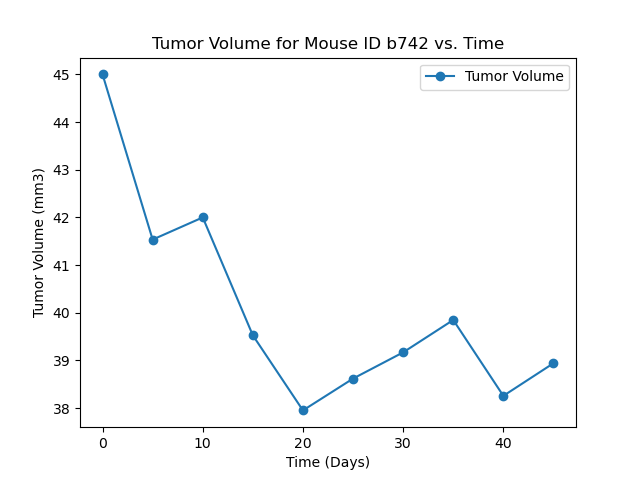

<AxesSubplot:title={'center':'Tumor Volume for Mouse ID b742 vs. Time'}, xlabel='Time (Days)', ylabel='Tumor Volume (mm3)'>

In [76]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
time = only_b742["Timepoint"]
tumor_volume = only_b742["Tumor Volume (mm3)"]

volume_time_df = pd.DataFrame({
    "Time": time,
    "Tumor Volume": tumor_volume
})

volume_time_df.plot("Time", "Tumor Volume", kind="line", title="Tumor Volume for Mouse ID b742 vs. Time", xlabel="Time (Days)", ylabel="Tumor Volume (mm3)", marker="o")

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
